In [3]:
%matplotlib inline
from keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.special
import scipy.ndimage
import scipy.signal
import sys
from random import *

Using TensorFlow backend.


In [4]:
 (x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
class NN:
    def __init__(self, rate, inputs, hiddens, outputs):
        #Добавляем 1 вход под bias
        self.i_count = inputs + 1
        self.h_count = hiddens
        self.o_count = outputs
        #Заполняем массивы весов рандомом
        self.w_ih = np.random.normal(0.0, pow(self.h_count, -0.5), (self.h_count, self.i_count))
        self.w_ho = np.random.normal(0.0, pow(self.o_count, -0.5), (self.o_count, self.h_count))
        #learning rate и сигмоид
        self.lr = rate
        self.activation_function = lambda x: scipy.special.expit(x)
        
    def train(self, inputs_list, targets_list):
        #Добавляем 1 вход под bias
        inputs_list = np.concatenate((inputs_list, [1]), axis=0)
        #Вектор-столбцы входных данных и правильных ответов
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        #Прямое распространение, сигмоид и линеар
        hid_results = self.activation_function(np.dot(self.w_ih, inputs))
        out_results = self.activation_function(np.dot(self.w_ho, hid_results))
        #ошибка обучения (Training Erorr)
        out_errors = (targets - out_results)
        #ошибки скрытого слоя
        hid_errors = np.dot(self.w_ho.T, out_errors)
        #поправки для весов скрытый-выход
        self.w_ho += self.lr * np.dot(out_errors * out_results * (1.0 - out_results), np.transpose(hid_results))
        #поправки для весов вход-скрытый
        self.w_ih += self.lr * np.dot((hid_errors * hid_results * (1.0 - hid_results)), np.transpose(inputs))
        
    def query(self, inputs_list):
        #добавляем 1 вход под bias
        inputs_list = np.concatenate((inputs_list, [1]), axis=0)
        #вектор-столбец входных данных
        inputs = np.array(inputs_list, ndmin=2).T
        #прямое распространение, сигмоид и линеар
        hid_results = self.activation_function(np.dot(self.w_ih, inputs))
        out_results = self.activation_function(np.dot(self.w_ho, hid_results))
        return out_results
    
    def set_lr(self, rate):
        self.lr = rate

In [6]:
nn = NN(0.1, 784, 100, 10)

1


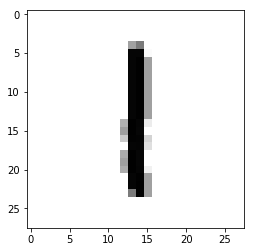

In [8]:
n = 102
print(y_train[n])
plt.imshow(225-x_train[n]/225, cmap='gray')

In [10]:
 def predict(n):
        query = np.array(x_train[n]/255).reshape(784)
        return nn.query(query)

In [20]:
predict(n).argmax()

1

In [11]:
def learn(n):
    target = np.zeros(10)
    target[y_train[n]] = 1
    query = np.array(x_train[n]/255).reshape(784)
    nn.train(query, target)

In [12]:
def epoch_train():
    nn.set_lr(0.1)
    x_train_len = len(x_train)
    for n in range(x_train_len):
        learn(n)
        if n%100 == 0:
            sys.stdout.write("Row: %s\r" % n)
            sys.stdout.flush()

In [19]:
epoch_train()

In [14]:
def test_NN():
    correct = 0
    x_test_len = len(x_test)
    for n in range(x_test_len):
        answers = predict(n)
        if answers.argmax() == y_test[n]:
            correct += 1
    return correct/(n+1)

In [23]:
test_NN()

0.0981

In [21]:
def test_train_NN():
    correct = 0
    x_train_len = len(x_train)
    for n in range(x_train_len):
        answers = predict(n)
        if answers.argmax() == y_train[n]:
            correct += 1
    return correct/(n+1)

In [22]:
test_train_NN()

0.96735